In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


# Step 1: Importing and Understanding the Data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df.shape

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(205, 26)

In [3]:
df.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


# Step 2: Data Preparation

In [10]:
# Dropping irrelevant features
updated_df = df.drop(['car_ID', 'symboling','fueltype', 'doornumber', 'enginelocation',
        'carheight', 'citympg', 'highwaympg', 
         'stroke', 'compressionratio', 'drivewheel', 'enginetype', 'carbody', 'fuelsystem',
        'peakrpm'], axis=1)
updated_df

,CarName,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,price
0,alfa-romero giulia,std,88.6,168.8,64.1,2548,four,130,3.47,111,13495.0
1,alfa-romero stelvio,std,88.6,168.8,64.1,2548,four,130,3.47,111,16500.0
2,alfa-romero Quadrifoglio,std,94.5,171.2,65.5,2823,six,152,2.68,154,16500.0
3,audi 100 ls,std,99.8,176.6,66.2,2337,four,109,3.19,102,13950.0
4,audi 100ls,std,99.4,176.6,66.4,2824,five,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),std,109.1,188.8,68.9,2952,four,141,3.78,114,16845.0
201,volvo 144ea,turbo,109.1,188.8,68.8,3049,four,141,3.78,160,19045.0
202,volvo 244dl,std,109.1,188.8,68.9,3012,six,173,3.58,134,21485.0
203,volvo 246,turbo,109.1,188.8,68.9,3217,six,145,3.01,106,22470.0


In [11]:
# Identify missing and duplicate columns
check_missing_values = updated_df.isna().values.sum()
print("Number of missing values: ", check_missing_values)
check_duplicate_values = updated_df.duplicated().values.sum()
print("Number of duplicate values: ", check_duplicate_values)

Number of missing values:  0
Number of duplicate values:  0


# Reminder
    Identify the categorical type before converting
    


In [12]:
# Check for the unique values of the dataset columns
updated_df.nunique()

CarName           147
aspiration          2
wheelbase          53
carlength          75
carwidth           44
curbweight        171
cylindernumber      7
enginesize         44
boreratio          38
horsepower         59
price             189
dtype: int64

In [13]:
# So before proceeding with the converting of the categorical values
# I first, get the brand of the CarName, which I see that it appears on the
# first word of the CarName columns values
# and store it to a carbrand column
updated_df['carbrand'] = updated_df['CarName'].apply(lambda x: x.split()[0])
# Drop the CarName column
updated_df = updated_df.drop(['CarName'], axis=1)

I will use the Top N categories technique to handle the carbrand values 
so I will only select the top 10 most buyed car brands and I will group the rest 
to a single category labeled as 'Other'

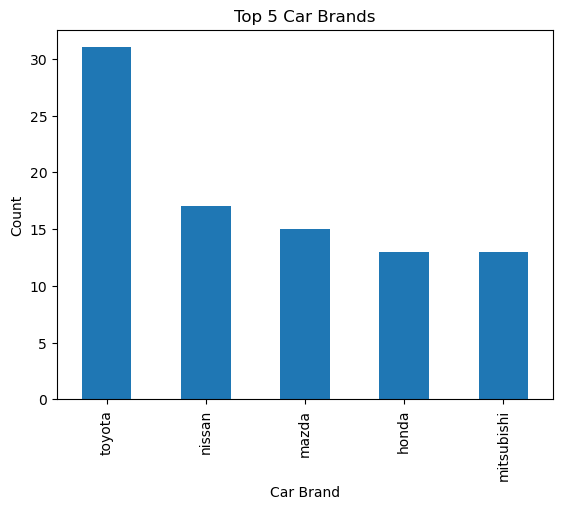

In [14]:
ax = updated_df['carbrand'].value_counts().head(5) \
    .plot(kind='bar', title='Top 5 Car Brands')
ax.set_xlabel('Car Brand')
ax.set_ylabel('Count')
plt.show()

In [15]:
# Determine the top N car brands to keep
top_n = 5

# Calculate the frequency of each car brand
car_brand_counts = updated_df['carbrand'].value_counts()

# Select the Top N car brands
top_car_brands = car_brand_counts[:top_n].index.tolist()

# group the remaining car brands into 'other'

updated_df['top_brands'] = updated_df['carbrand'].apply(lambda x: x if x in top_car_brands else 'Other')

# Encode the 'Top_Brands' column using one-hot encoding
encoded_df = pd.get_dummies(updated_df, columns=['top_brands'])


<!-- I will use word2number library in Python to convert the cylindernumber column
from word2number import w2n encoded_df['cylindernumber'] = encoded_df['cylindernumber'].apply(w2n.word_to_num)  -->

I cannot install word2number python library so,
I will just create a custom mapping dictionary for the cylinder column


In [16]:
# Check first what are the values of the cylinder column
encoded_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [17]:
# Create custom mapping dictionary for cylindernumber column
word_to_number = {
    'two' : 2,
    'three' : 3,
    'four' : 4, 
    'five' : 5,
    'six' : 6,
    'eight' : 8,
    'twelve' : 12
}

# function to replace number words to numeric values
def replace_with_numeric(word):
    return word_to_number.get(word, word) # if not found in mapping, keep the original word

encoded_df['cylindernumber'] = encoded_df['cylindernumber'].apply(replace_with_numeric)

In [18]:
encoded_df.head(20)

,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,price,carbrand,top_brands_Other,top_brands_honda,top_brands_mazda,top_brands_mitsubishi,top_brands_nissan,top_brands_toyota
0,std,88.6,168.8,64.1,2548,4,130,3.47,111,13495.000,alfa-romero,1,0,0,0,0,0
1,std,88.6,168.8,64.1,2548,4,130,3.47,111,16500.000,alfa-romero,1,0,0,0,0,0
2,std,94.5,171.2,65.5,2823,6,152,2.68,154,16500.000,alfa-romero,1,0,0,0,0,0
3,std,99.8,176.6,66.2,2337,4,109,3.19,102,13950.000,audi,1,0,0,0,0,0
4,std,99.4,176.6,66.4,2824,5,136,3.19,115,17450.000,audi,1,0,0,0,0,0
5,std,99.8,177.3,66.3,2507,5,136,3.19,110,15250.000,audi,1,0,0,0,0,0
6,std,105.8,192.7,71.4,2844,5,136,3.19,110,17710.000,audi,1,0,0,0,0,0
7,std,105.8,192.7,71.4,2954,5,136,3.19,110,18920.000,audi,1,0,0,0,0,0
8,turbo,105.8,192.7,71.4,3086,5,131,3.13,140,23875.000,audi,1,0,0,0,0,0
9,turbo,99.5,178.2,67.9,3053,5,131,3.13,160,17859.167,audi,1,0,0,0,0,0


In [19]:
# I will drop the carbrand column one top brand which has the lowest value counts
encoded_df = encoded_df.drop(['carbrand', 'top_brands_mitsubishi'], axis=1)

In [20]:
encoded_df.head(10)

,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,price,top_brands_Other,top_brands_honda,top_brands_mazda,top_brands_nissan,top_brands_toyota
0,std,88.6,168.8,64.1,2548,4,130,3.47,111,13495.000,1,0,0,0,0
1,std,88.6,168.8,64.1,2548,4,130,3.47,111,16500.000,1,0,0,0,0
2,std,94.5,171.2,65.5,2823,6,152,2.68,154,16500.000,1,0,0,0,0
3,std,99.8,176.6,66.2,2337,4,109,3.19,102,13950.000,1,0,0,0,0
4,std,99.4,176.6,66.4,2824,5,136,3.19,115,17450.000,1,0,0,0,0
5,std,99.8,177.3,66.3,2507,5,136,3.19,110,15250.000,1,0,0,0,0
6,std,105.8,192.7,71.4,2844,5,136,3.19,110,17710.000,1,0,0,0,0
7,std,105.8,192.7,71.4,2954,5,136,3.19,110,18920.000,1,0,0,0,0
8,turbo,105.8,192.7,71.4,3086,5,131,3.13,140,23875.000,1,0,0,0,0
9,turbo,99.5,178.2,67.9,3053,5,131,3.13,160,17859.167,1,0,0,0,0


In [21]:
# I will use LabelEncoder for the Ordinal values and 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_df['aspiration_encoded'] = le.fit_transform(encoded_df['aspiration']) + 1

In [22]:
encoded_df = encoded_df.drop(['aspiration'], axis=1)
encoded_df.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,price,top_brands_Other,top_brands_honda,top_brands_mazda,top_brands_nissan,top_brands_toyota,aspiration_encoded
0,88.6,168.8,64.1,2548,4,130,3.47,111,13495.0,1,0,0,0,0,1
1,88.6,168.8,64.1,2548,4,130,3.47,111,16500.0,1,0,0,0,0,1
2,94.5,171.2,65.5,2823,6,152,2.68,154,16500.0,1,0,0,0,0,1
3,99.8,176.6,66.2,2337,4,109,3.19,102,13950.0,1,0,0,0,0,1
4,99.4,176.6,66.4,2824,5,136,3.19,115,17450.0,1,0,0,0,0,1


In [23]:
#Check the mapping of categories to labels
mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping
print(mapping)

{'std': 0, 'turbo': 1}


In [24]:
# I am gonna copy our dataFrame
final_df = encoded_df.copy()
final_df.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,price,top_brands_Other,top_brands_honda,top_brands_mazda,top_brands_nissan,top_brands_toyota,aspiration_encoded
0,88.6,168.8,64.1,2548,4,130,3.47,111,13495.0,1,0,0,0,0,1
1,88.6,168.8,64.1,2548,4,130,3.47,111,16500.0,1,0,0,0,0,1
2,94.5,171.2,65.5,2823,6,152,2.68,154,16500.0,1,0,0,0,0,1
3,99.8,176.6,66.2,2337,4,109,3.19,102,13950.0,1,0,0,0,0,1
4,99.4,176.6,66.4,2824,5,136,3.19,115,17450.0,1,0,0,0,0,1


In [25]:
# Check for the correlation of final dataFrame
final_df.corr()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,price,top_brands_Other,top_brands_honda,top_brands_mazda,top_brands_nissan,top_brands_toyota,aspiration_encoded
wheelbase,1.000000,0.874587,0.795144,0.776386,0.339507,0.569329,0.488750,0.353294,0.577816,0.322819,-0.191713,-0.056905,-0.148298,-0.060415,0.257611
carlength,0.874587,1.000000,0.841118,0.877728,0.430672,0.683360,0.606454,0.552623,0.682920,0.322980,-0.280778,-0.038414,-0.066600,-0.090086,0.234539
carwidth,0.795144,0.841118,1.000000,0.867032,0.545007,0.735433,0.559150,0.640732,0.759325,0.320530,-0.185212,-0.017656,-0.104420,-0.170150,0.300567
curbweight,0.776386,0.877728,0.867032,1.000000,0.609727,0.850594,0.648480,0.750739,0.835305,0.334764,-0.229843,-0.110372,-0.072423,-0.111634,0.324902
cylindernumber,0.339507,0.430672,0.545007,0.609727,1.000000,0.846031,0.231399,0.692016,0.718305,0.217823,-0.091824,-0.238136,0.090751,-0.073182,-0.047972
enginesize,0.569329,0.683360,0.735433,0.850594,0.846031,1.000000,0.583774,0.809769,0.874145,0.248942,-0.172881,-0.150883,0.020258,-0.096078,0.108217
boreratio,0.488750,0.606454,0.559150,0.648480,0.231399,0.583774,1.000000,0.573677,0.553173,0.280423,-0.296839,0.003027,-0.076983,-0.077227,0.212614
horsepower,0.353294,0.552623,0.640732,0.750739,0.692016,0.809769,0.573677,1.000000,0.808139,0.240115,-0.157561,-0.115748,0.003143,-0.143115,0.241685
price,0.577816,0.682920,0.759325,0.835305,0.718305,0.874145,0.553173,0.808139,1.000000,0.373849,-0.166260,-0.068967,-0.097043,-0.189616,0.177926
top_brands_Other,0.322819,0.322980,0.320530,0.334764,0.217823,0.248942,0.280423,0.240115,0.373849,1.000000,-0.297067,-0.320777,-0.343305,-0.481881,0.206345


In [26]:
final_df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'price', 'top_brands_Other',
       'top_brands_honda', 'top_brands_mazda', 'top_brands_nissan',
       'top_brands_toyota', 'aspiration_encoded'],
      dtype='object')

# Step 3. Train and Test our Model

In [27]:
# set features to all the columns of our final_df except for price
features = final_df.drop(['price'], axis=1)
X = features
y = final_df.price

In [28]:
# Create a train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# Create and fit the model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [30]:
# I will create a dataframe that only shows the actual price and the predicted price
#I will check our predicted X_test value
X_test_values = X_test
y_test_predicted = lr_model.predict(X_test_values)

#Create a dataframe for the predicted values (y_test_predicted)
y_test_predicted_df = pd.DataFrame(pd.Series(y_test_predicted, name='Predicted Price'))
# Reset the index for y_predicted_df
y_test_predicted_df.reset_index(drop=True, inplace=True)


#Create a Dataframe for the actual target values (y_test)
y_test_df = pd.DataFrame(pd.Series(y_test, name='Actual Price'))

# Reset the index for y_test_df
y_test_df.reset_index(drop=True, inplace=True)

#Concatenate the DataFrame horizontally to create a final DataFrame
train_test_df = pd.concat([y_test_df, y_test_predicted_df], axis=1)
train_test_df.head()

,Actual Price,Predicted Price
0,6795.0,7243.698381
1,15750.0,21354.131872
2,15250.0,15427.941551
3,5151.0,1260.194624
4,9995.0,12055.368571


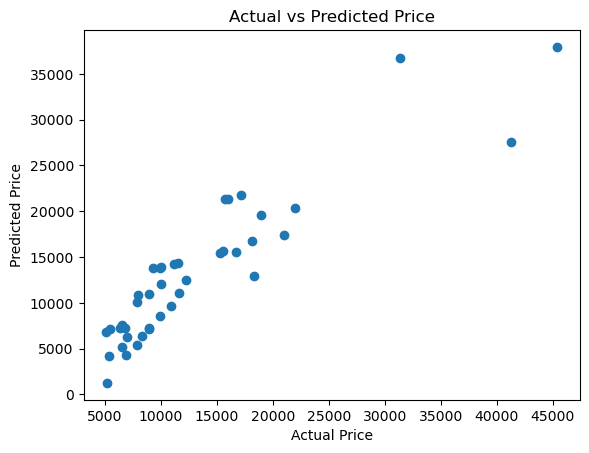

In [31]:
plt.scatter(y_test, y_test_predicted)
plt.title('Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [32]:
# I will use R2 score to check for how good the model is
from sklearn.metrics import r2_score, mean_absolute_error
print("R2 score: ", r2_score(y_test, y_test_predicted))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_test_predicted))

R2 score:  0.8284183648470325
Mean Absolute Error:  2689.637548042297


In [33]:
# I will now check the prediction or the Linear Regression Model on the Actual Data
lr_model.fit(X, y)
y_pred = lr_model.predict(X)

# Created a dataframe to compare the difference of the actual and predicted value
pred_y_df = pd.DataFrame({'Actual Price': y, 'Predicted Price': y_pred, 'Difference': y-y_pred})
pred_y_df

,Actual Price,Predicted Price,Difference
0,13495.0,13786.132145,-291.132145
1,16500.0,13786.132145,2713.867855
2,16500.0,21101.297464,-4601.297464
3,13950.0,12405.904323,1544.095677
4,17450.0,16756.816595,693.183405
...,...,...,...
200,16845.0,17510.321926,-665.321926
201,19045.0,19804.611915,-759.611915
202,21485.0,21569.860518,-84.860518
203,22470.0,18545.170501,3924.829499


In [34]:
# Check for the R2 score of our model in the Actual data
actual_pred_r2Score = r2_score(y, y_pred)

print("R2 Score of the Actual data {}%".format(round(actual_pred_r2Score * 100, 2)))
print("Mean Absolute Error of the Actual data {}".format(mean_absolute_error(y, y_pred)))

R2 Score of the Actual data 84.94%
Mean Absolute Error of the Actual data 2331.148299672717


# From whoever will read my code, feel free to add comment
# I am open for feedback to improve my knowledge
# Thank you